# Описание проекта
**Приоритезация маркетинговых гипотез, запуск А/В-теста и анализ результатов** <br>
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. <br>

**Цель проекта** — приоритезировать гипотезы и провести проверку самой востребованной из них. <br>

**Ход исследования:** <br>
- приоритезация гипотез;
- Анализ A/B-теста.

## Загрузка данных и подготовка их к анализу

### Первичная обработка датасетов

**Импортирование библиотек и выгрузка датасетов**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    print('Проверьте пути к файлам')

**Осмотр датасетов, вывод таблиц и информации о них**

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visitors.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Обработка названий столбцов, дубликатов и пропусков**

Переименование столбцов для избежания пробелов и заглавных букв в названии

In [9]:
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
visitors.columns = visitors.columns.str.lower().str.replace(' ', '_')

Проверка на дубликаты

In [10]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


Проверка на пропуски

In [11]:
print(hypothesis.isna().sum())
print(orders.isna().sum())
print(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


**Изменение типа столбцов**

In [12]:
orders.date = pd.to_datetime(orders.date)
visitors.date = pd.to_datetime(visitors.date)

**Проверка данных на дефекты**

Датасет orders

In [13]:
orders.transactionid = abs(orders.transactionid)
orders.visitorid = abs(orders.visitorid)

print('id транзакций')
print(orders.transactionid.max())
print(orders.transactionid.min())
print()
print('id визитов')
print(orders.visitorid.max())
print(orders.visitorid.min())
print()
print('время заказов')
print(orders.date.max())
print(orders.date.min())
print()
print('revenue')
print(orders.revenue.max())
print(orders.revenue.min())
print()
print('группы')
print(orders.group.unique())

id транзакций
4293855558
1062393

id визитов
4283872382
5114589

время заказов
2019-08-31 00:00:00
2019-08-01 00:00:00

revenue
1294500
50

группы
['B' 'A']


Датасет visitors

In [14]:
visitors.visitors = abs(visitors.visitors)

print('время посещений')
print(visitors.date.max())
print(visitors.date.min())
print()
print('группы')
print(visitors.group.unique())
print()
print('посещения')
print(visitors.visitors.max())
print(visitors.visitors.min())

время посещений
2019-08-31 00:00:00
2019-08-01 00:00:00

группы
['A' 'B']

посещения
770
361


Проверим таблицу orders на пользователей, оказавшихся в двух группах одновременно

In [15]:
print(orders['visitorid'].nunique())
print(orders.groupby('group')['visitorid'].nunique())

1031
group
A    503
B    586
Name: visitorid, dtype: int64


Некоторые пользователи состоят в обеих группах одновременно. Исключим их

In [16]:
a_orders = orders[orders['group'] == 'A']
b_orders = orders[orders['group'] == 'B']

u = []

for i in a_orders['visitorid']:
    for j in b_orders['visitorid']:
        if i == j:
            u.append(j)

a_orders = a_orders[a_orders.visitorid.isin(u)==False]            
b_orders = b_orders[b_orders.visitorid.isin(u)==False]
orders = pd.concat([a_orders, b_orders]).reset_index(drop=True)

y = pd.DataFrame({'e':u})
print('Количество пользователей в обеих группах', len(y.e.unique()))

Количество пользователей в обеих группах 58


In [17]:
print(orders['visitorid'].nunique())
print(orders.groupby('group')['visitorid'].nunique())

973
group
A    445
B    528
Name: visitorid, dtype: int64


Пользователи удалены

**Вывод:** данные соответствуют ТЗ и не имеют логических или же математических аномалий.

### Преоритизация гипотез

Приоретизируем гипотезы методами ICE и RICE. Добавим новые столбцы в датафрейм:

In [18]:
hypothesis['ice'] = round(hypothesis.impact * hypothesis.confidence / hypothesis.efforts, 2)
hypothesis['rice'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts

In [19]:
hypothesis_ice = hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)
hypothesis_rice = hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

In [20]:
pd.options.display.max_colwidth = 1
hypothesis_ice

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [21]:
hypothesis_rice

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** при методе RICE оценка приоритезации несколько изменилась за счёт того, что в анализ был включен параметр Reach - количество пользователей, которых затронет изменение. Из-за различия аудитории, на которой будут проверенны те или иные гипотезы, меняется и получающийся эффект, который получается после их проверок. Например гипотеза 7 сперва занимала третье место, но после добавления Reach, вышла на первое из-за большого количества охватываемой аудитории.

## Анализ А/В-теста

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения


Создадим таблицу, объединяющую кумулятивные данные по дням по заказам и посещениям

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [23]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [24]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

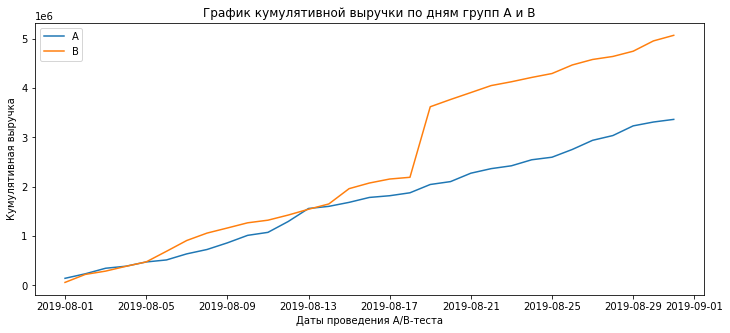

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

plt.figure(figsize=(12,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням групп А и В')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Кумулятивная выручка')

plt.legend()
plt.show();

**Вывод:** резский всплеск в группе В говорит о наличие выбросов, которые заметно изменяют картину выручки в данной группе. Определённые выводы можно делать лишь после удаления всех выбросов и корректировки данных.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

С помощью датафрейма из предыдущего задания строим график кумулятивного среднего чека по группам

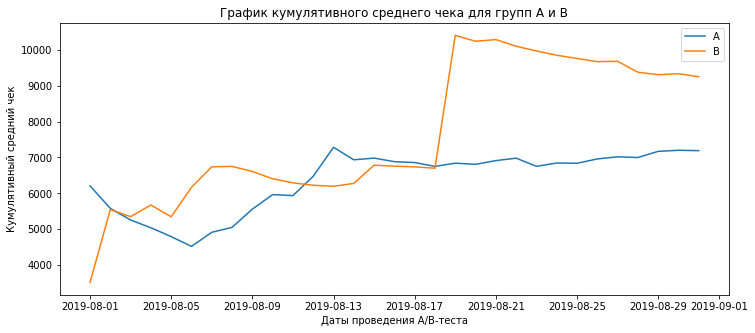

In [27]:
plt.figure(figsize=(12,5))

#делим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('График кумулятивного среднего чека для групп А и В')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Кумулятивный средний чек')
plt.show();

**Вывод:** средний чек так же имеет аномалию в группе В и сильно превосходит группу А, что не позволяет делать определённых выводов на данном этапе исследования. Требуется провести очистку датафрейма от выбросов

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

С помощью того же самого датафрейма строим график относительного изменения кумулятивного среднего чека группы В к группе А

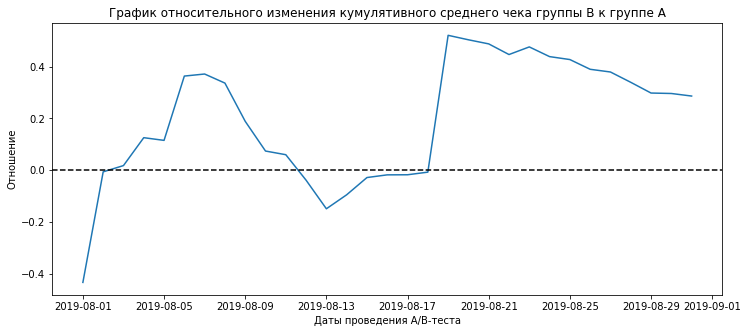

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Отношение');

**Вывод:** график всё так же резко скачет в некоторых местах, что подтверждает предыдущие выводы о наличии сильных выбросов в определённых датах

### Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения

Построим график кумулятивного среднего количества заказов по группам

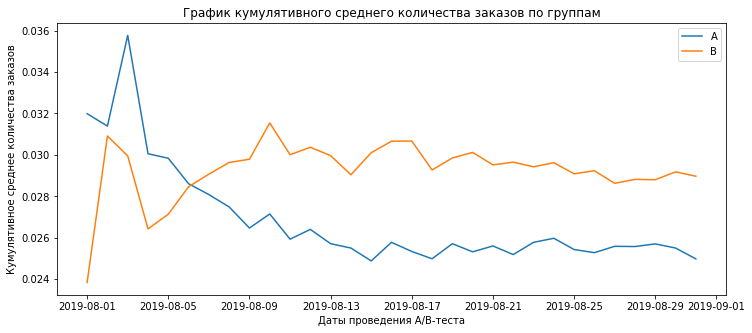

In [29]:
plt.figure(figsize=(12,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Кумулятивное среднее количества заказов')

plt.legend()
plt.show();

**Вывод:** из графика видно, что среднее количество заказов после пятого августа в группе В превосходит группу А. Так же существуют скачки, как в предыдущих графиках. Следовательно можно предположить, что предыдущие аномалии могут быть связаны как с количеством единовременных заказов, так и с их ценой

### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения

Строим график относительного изменения кумулятивного среднего количесвто заказов группы В к группе А

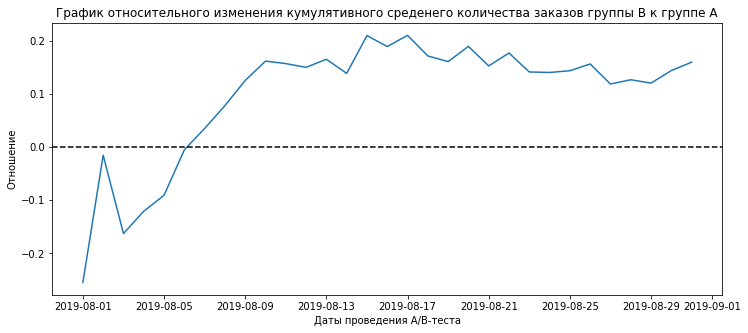

In [30]:
plt.figure(figsize=(12, 5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среденего количества заказов группы В к группе А')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Отношение');

**Вывод:** после 2019-08-05 отношение кумулятивного среднего количества заказов группы В резко возрастает и вскоре становится больше уровня группы А и в целом не имеет тенденции к снижению

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

Создадим таблицу с уникальными пользователями и количеством их заказов

In [31]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим точечный график распределение количества заказов по пользователям

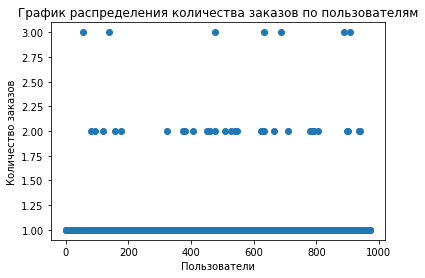

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('График распределения количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

**Вывод:** количество пользователей с двумя и тремя заказами значительна, но ещё не известно, на сколько, относительно основной доли покупателей с одним заказом

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


**Вывод:** лишь 5 процентов пользователей заказывают более одного заказа, и лишь один - более двух. Можно взять за верхнюю границу 2 заказа на одного пользователя

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

Построим точечный график стоимостей заказов

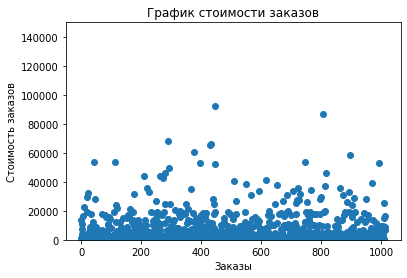

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ylim([0,150000])
plt.scatter(x_values, orders['revenue'])

plt.title('График стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов');

**Вывод:** как минимум десяток заказов превосходят по стоимости среднюю цену заказа в несколько раз

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов для определения границы для аномальных заказов

In [35]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод:** оставим границу на уровне 35 тысяч

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения

Подготовим данные, создав один большой датафрейм со всеми интересующими нас столбцами

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Названия столбцов датафрейма:

**date** — дата; <br>
**ordersPerDateA** — количество заказов в выбранную дату в группе A; <br>
**revenuePerDateA** — суммарная выручка в выбранную дату в группе A; <br>
**ordersPerDateB** — количество заказов в выбранную дату в группе B; <br>
**revenuePerDateB** — суммарная выручка в выбранную дату в группе B; <br>
**ordersCummulativeA** — суммарное число заказов до выбранной даты включительно в группе A; <br>
**revenueCummulativeA** — суммарная выручка до выбранной даты включительно в группе A; <br>
**ordersCummulativeB** — суммарное количество заказов до выбранной даты включительно в группе B; <br>
**revenueCummulativeB** — суммарная выручка до выбранной даты включительно в группе B; <br>
**visitorsPerDateA** — количество пользователей в выбранную дату в группе A; <br>
**visitorsPerDateB** — количество пользователей в выбранную дату в группе B; <br>
**visitorsCummulativeA** — количество пользователей до выбранной даты включительно в группе A; <br>
**visitorsCummulativeB** — количество пользователей до выбранной даты включительно в группе B. <br>

**Формулируемые гипотезы** - средние количества заказов между группами равны; равенство средних чеков двух групп. <br>
**Используемый тест** - Mann-Whitney U test <br>
**Уровень статистической значимости** - принимаем равным 0.05 <br>

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули

In [38]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [39]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


**Вывод:** статистическая значимость меньше 0.05, значит нулевая гипотеза о равенстве среднего количества заказов в группах по сырым данным неверна. Относительный прирост группы В над группой А по среднему числу заказов = 0.160

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по сырым данным

In [40]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


**Вывод:** статистическая значимость гораздо больше 0.05, значит по сырым данным отвергать нулевую гипотезу и говорить, что в средних чеках на заказ есть различия, причин нет. Относительный прирост группы В над группой А по среднему чеку по сырым данным = 0.287.

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения

Вычленим аномальных пользователей по указанным нами выше границам

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

431    148427295
33     249864742
273    358944393
262    382846391
58     611059232
Name: visitorid, dtype: int64
37


Имеем 37 аномальных пользователей. Очистим наши данные от этих пользователей и найдём статистическую значимость различий в среднем количестве заказов между группами по очищенным данным

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [43]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.194


**Вывод:** статистическая значимость стала ещё меньше, что говорит о неравенстве среднего количества заказов двух групп. Относительный прирост по среднему количеству заказов группы В выше группы А по сырым данным = 0.194 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

Считаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным

In [44]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

0.869


**Вывод:** статистическая значимость гораздо больше 0.05, следовательно различий в среднем чеке заказа между группами нет.

### Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Построим графики относительных различий в среднем чеке заказа и в среднем количестве самих заказов между группами для наглядности наших выводов

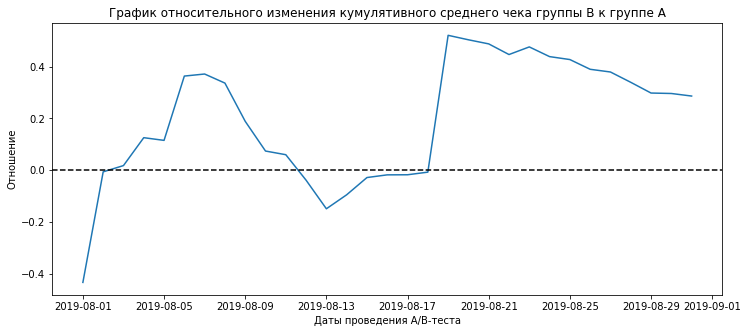

In [45]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Отношение');

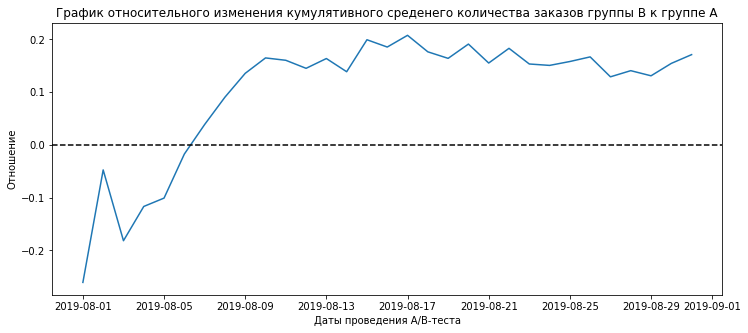

In [46]:
plt.figure(figsize=(12, 5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среденего количества заказов группы В к группе А')
plt.xlabel('Даты проведения А/В-теста')
plt.ylabel('Отношение');

**Вывод:** после очищения наших данных, статистическая значимость различных показателей почти не изменилась. Исходя из вышепредставленных графиков и p-value, можно признать тест успешным, так как существуют статистически значимые различия между группами В и А по среднему количеству заказов

# Общие выводы

**Была проведена работа над приоретизициями гипотез, а так же анализ результатов А/В-тестирования**

**Перед началом работы поставлены задачи:**
- Приоретизировать гипотезы для определения их важности и очерёдности проверки;
- Сравнить результаты приоретизации методами "ICE" и "RICE";
- Проанализировать результаты А/В-тестирования гипотезы и сделать вывод о проведённом тесте.


**В результате проведённой работы было выявлено следующее:**

1) Приоретизация гипотез может координально различаться после добавления кретерия охвата аудитории, которую коснётся то или иное нововведение <br/>
2) Существует статистические значимые различия между группами по среднему количеству заказов: группа В превосходит группу А по относительному приросту этого показателя на 19.4% <br/>
3) Одновременно с этим не существует статистически значимого различия между группами по среднему чеку заказа <br/>
4) Необходимо остановить проведение теста и постановить о его успешности ввиду наличия превосходства группы В над группой А по уровню среднего количества заказов при неизменном уровне среднего чека <br/>
    
**Общие рекомендации:**
Завершение теста и принятия его успешности и внидрении проверенной гипотезы в роботу компании, так как при увеличении числа заказов в группе В средний чек остаётся таким же.